# Praktikum 3


In [21]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import Lab3Functions as lf3

import data...

In [23]:
weights, mvc, fatigue = lf3.import_data('\t')

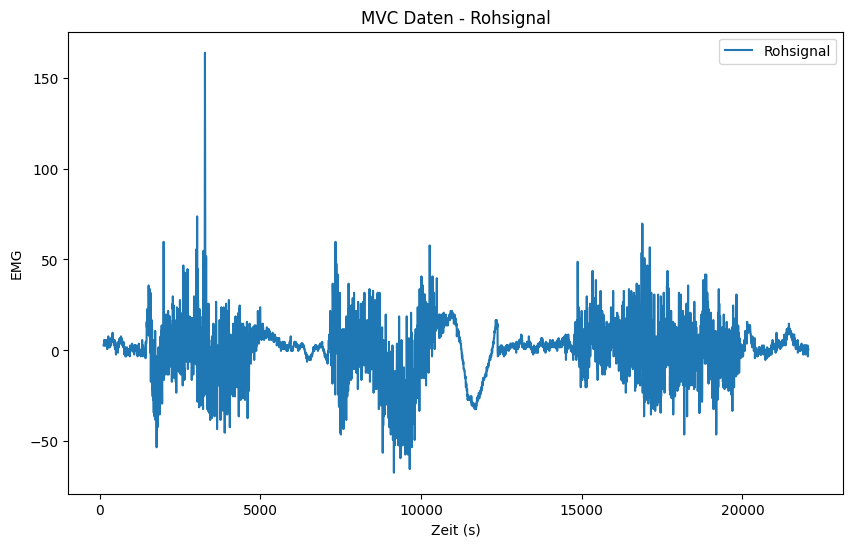

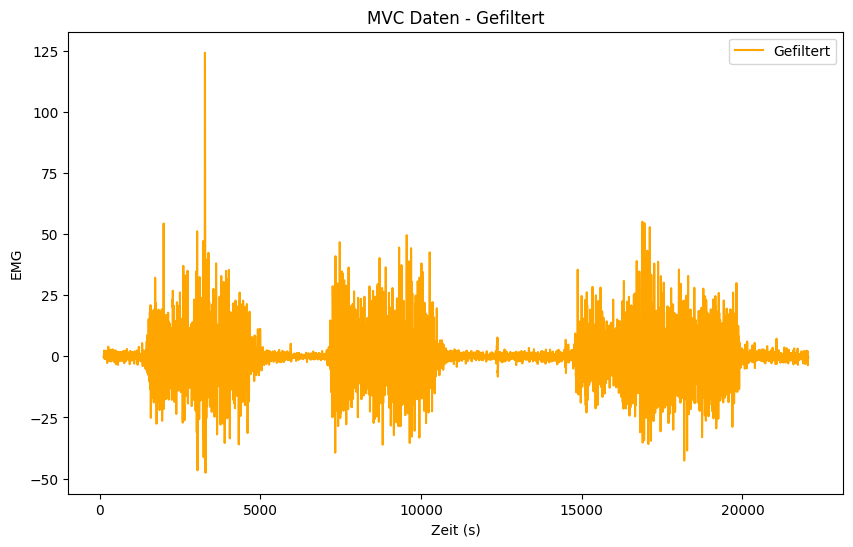

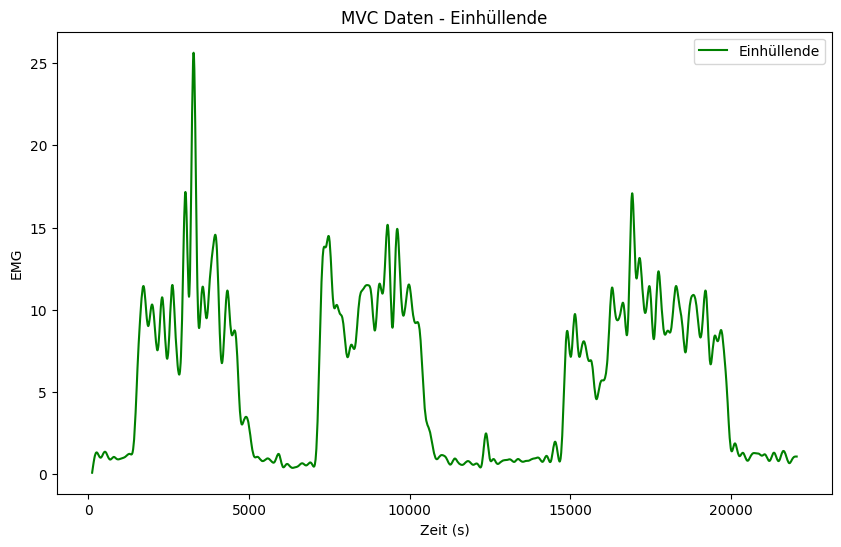

In [30]:
# Hoch- und Tiefpassfilter definieren
def butterworth_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low')
    return signal.filtfilt(b, a, data)

# Hauptverarbeitungsschritte
def process_emg_data(data, fs=1000):
    # Offset entfernen
    data['emg'] = data['emg'] - np.mean(data['emg'])

    # Bandpassfiltern (20-450 Hz)
    data['filtered_emg'] = butterworth_filter(data['emg'], 20, 450, fs)

    # Signal gleichrichten (Absolutwert bilden)
    data['rectified_emg'] = np.abs(data['filtered_emg'])

    # Tiefpassfilter auf den Absolutwert anwenden (10 Hz)
    data['envelope'] = lowpass_filter(data['rectified_emg'], 10, fs)

    return data




# EMG-Daten verarbeiten
mvc_processed = process_emg_data(mvc)


def plot_emg(data, title_prefix):
    plt.figure(figsize=(10, 6))
    plt.plot(data['t'], data['emg'], label='Rohsignal')
    plt.title(f'{title_prefix} - Rohsignal')
    plt.xlabel('Zeit (s)')
    plt.ylabel('EMG')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(data['t'], data['filtered_emg'], label='Gefiltert', color='orange')
    plt.title(f'{title_prefix} - Gefiltert')
    plt.xlabel('Zeit (s)')
    plt.ylabel('EMG')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(data['t'], data['envelope'], label='Einhüllende', color='green')
    plt.title(f'{title_prefix} - Einhüllende')
    plt.xlabel('Zeit (s)')
    plt.ylabel('EMG')
    plt.legend()
    plt.show()

plot_emg(mvc_processed, 'MVC Daten')
    




2. gemittelte Daten von MVC berechnen und in ein csv datei abspeichern (ohne Berücksichtigung der 1. import data...)

In [ ]:
def read_txt_file(filepath):
    return np.loadtxt(filepath)

def pad_data_to_max_length(*datasets):
    max_length = max(len(dataset) for dataset in datasets)
    padded_datasets = [
        np.pad(dataset, ((0, max_length - len(dataset)), (0, 0)), mode='constant', constant_values=0)
        for dataset in datasets
    ]
    return padded_datasets

def calculate_average_data(*datasets):
    return np.mean(datasets, axis=0)

def process_personal_data(filepaths, output_csv):
    # Daten einlesen
    datasets = [read_txt_file(filepath) for filepath in filepaths]
   
    # Daten auf gleiche Länge polstern
    padded_datasets = pad_data_to_max_length(*datasets)
    
    # Mittelwert berechnen
    average_data = calculate_average_data(*padded_datasets)
    
    # Ergebnis als DataFrame speichern
    average_df = pd.DataFrame(average_data, columns=['Value', 'Time'])
    average_df.to_csv(output_csv, index=False)
    print(f"Durchschnittsdaten gespeichert in: {output_csv}")

person1_files = ["MVC_1_Andreas.txt", "MVC_2_Andreas.txt", "MVC_3_Andreas.txt", "MVC_4_Andreas.txt"]
person2_files = ["MVC_1_Carina.txt", "MVC_2_Carina.txt", "MVC_3_Carina.txt", "MVC_4_Carina.txt"]
person3_files = ["MVC_1_Pauline.txt", "MVC_2_Pauline.txt", "MVC_3_Pauline.txt", "MVC_4_Pauline.txt"]

# Verarbeitung der Daten von Andreas
process_personal_data(person1_files, "average_MVC_Andreas.csv")

# Verarbeitung der Daten von Clara
process_personal_data(person2_files, "average_MVC_Carina.csv")

# Verarbeitung der Daten von Pauline
process_personal_data(person3_files, "average_MVC_Pauline.csv")


Durchschnittsdaten gespeichert in: average_MVC_Andreas.csv


FileNotFoundError: MVC_1_Carina.txt not found.

In [16]:
def get_bursts(mvc_emg_filtered, weights_emg_filtered, fatigue_emg_filtered):   
    def get_individual_burst(x):
        def tellme(s):
            print(s)
            plt.title(s, fontsize=16)
            plt.draw()
            
        plt.clf()
        plt.setp(plt.gca(), autoscale_on=True)
        plt.plot(x)
       
        tellme('Click once to start zoom')
        plt.waitforbuttonpress()
        
        while True:
            tellme('Select two corners of zoom, enter/return key to finish')
            pts = plt.ginput(2, timeout=-1)
            if len(pts) < 2:
                break
            (x0, y0), (x1, y1) = pts
            xmin, xmax = sorted([x0, x1])
            ymin, ymax = sorted([y0, y1])
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
          
            
        tellme('Choose start of activity')    
        s = plt.ginput(1)
        tellme('Choose end of activity')   
        e = plt.ginput(1)
        s1 = s[0]
        e1 = e[0]
        start = int(s1[0].astype(int))
        end = int(e1[0].astype(int))
        plt.show()
        
        return start,end
    number_bursts = 3
    mvc_start = np.empty(number_bursts)
    mvc_end = np.empty(number_bursts)
    weights_start = np.empty(number_bursts)
    weights_end = np.empty(number_bursts)
    fatigue_start = np.empty(number_bursts)
    fatigue_end = np.empty(number_bursts)
    for i in range(number_bursts):
        mvc_start[i], mvc_end[i] = get_individual_burst(mvc_emg_filtered)
    for i in range(number_bursts): 
        weights_start[i], weights_end[i] = get_individual_burst(weights_emg_filtered)
    for i in range(number_bursts): 
        fatigue_start[i], fatigue_end[i] = get_individual_burst(fatigue_emg_filtered)  
       
    mvc_start = mvc_start.astype(int)
    mvc_end = mvc_end.astype(int)
    weights_start = weights_start.astype(int)
    weights_end = weights_end.astype(int)
    fatigue_start = fatigue_start.astype(int)
    fatigue_end = fatigue_end.astype(int)
    
    
    return mvc_start, mvc_end, weights_start, weights_end, fatigue_start, fatigue_end